In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from tensorflow import keras
from tensorflow.keras import layers 

In [8]:
#Import Dataset

Dataset = pd.read_csv("sample_data/diamonds.csv")
Dataset = Dataset.drop("Unnamed: 0", axis=1)
Dataset.head(10)


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [9]:
Dataset.shape
Dataset.describe()

,carat,depth,table,price,x,y,z
count,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000
mean,0.797935,61.749322,57.457251,3932.734294,5.731158,5.734526,3.538730
std,0.473999,1.432626,2.234549,3989.338447,1.121730,1.142103,0.705679
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [4]:
Dataset["Volume"] = Dataset["x"]*Dataset["y"]*Dataset["z"]
Dataset.describe()

,carat,depth,table,price,x,y,z,Volume
count,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000
mean,0.797935,61.749322,57.457251,3932.734294,5.731158,5.734526,3.538730,129.848539
std,0.473999,1.432626,2.234549,3989.338447,1.121730,1.142103,0.705679,78.243172
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000,65.136830
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,114.808572
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000,170.841804
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,3840.598060


In [5]:
Dataset = Dataset[(Dataset['Volume'] < 750) & (Dataset['Volume'] > 0)]

Text(0.5, 1.0, 'Corrlation Heatmap')

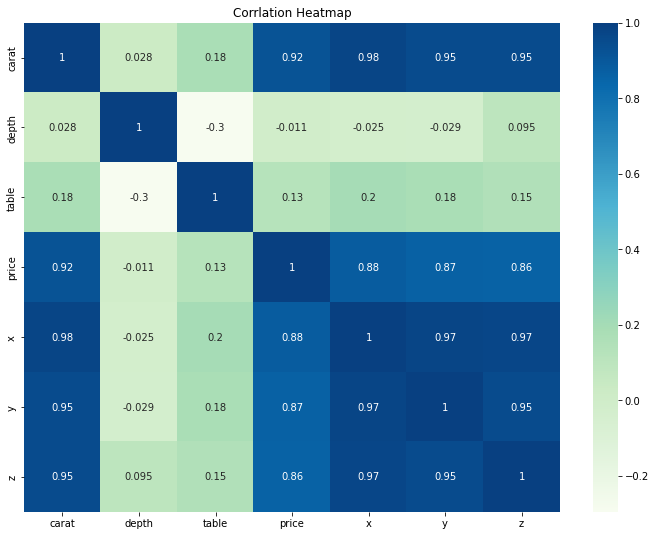

In [13]:
#Corrlation Heatmap

fig = plt.figure(figsize = (12,9))
sns.heatmap(Dataset.corr(), annot=True, cmap="GnBu")
plt.title("Corrlation Heatmap")

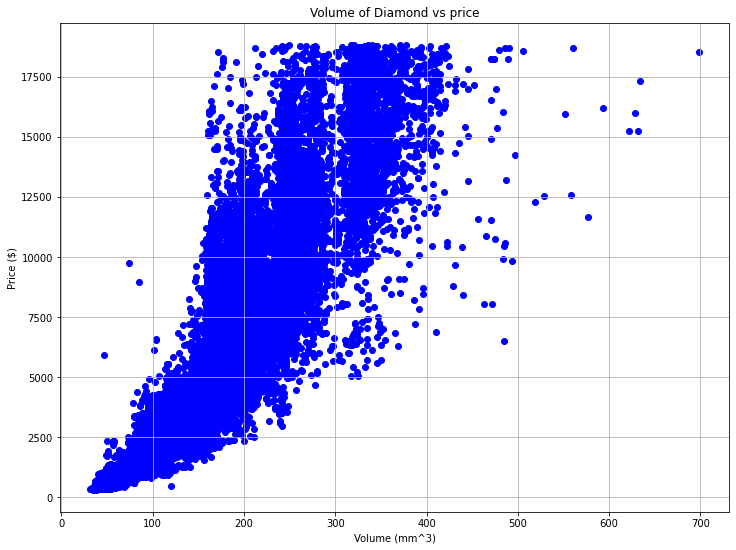

In [6]:
#Scatter graph

xData = Dataset["Volume"]
yData = Dataset["price"]
category = Dataset['cut']

fig = plt.figure(figsize = (12,9))
plt.scatter(xData, yData, color = "b")
plt.title("Volume of Diamond vs price")
plt.ylabel("Price ($)")
plt.xlabel("Volume (mm^3)")
plt.grid()
plt.show()

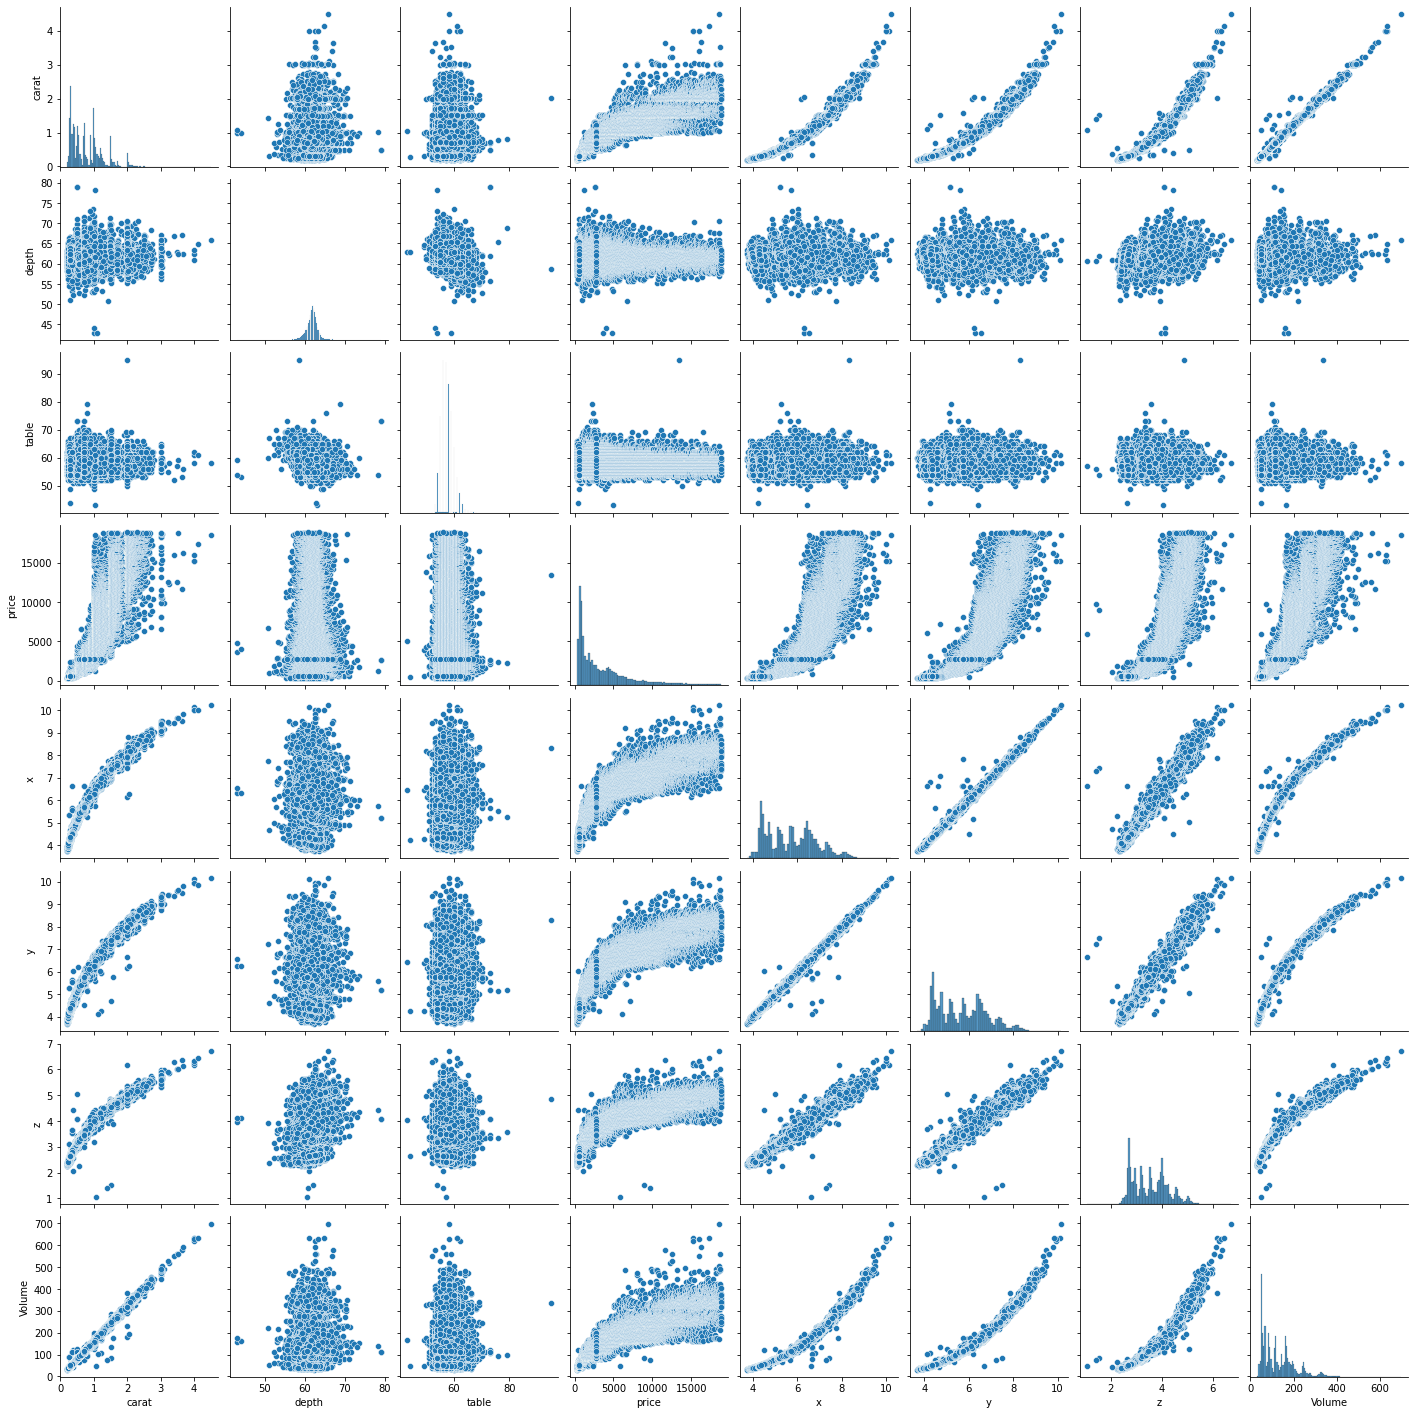

In [ ]:
sns.pairplot(Dataset)

In [ ]:
#Find catagorical varibles and encode

s = (Dataset.dtypes =="object")
object_cols = list(s[s].index)
print("Catagorical varibles:")
print(object_cols)
Ordinal_Encoder = OrdinalEncoder()
Dataset[object_cols] = Ordinal_Encoder.fit_transform(Dataset[object_cols])

#PreProssesing

y = Dataset.price

X = Dataset.drop(["price", "x", "y", "z"], axis=1)

X_train, X_test, y_train, y_test =  train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 0)

#Fit model (XGBoost)

XG = XGBRegressor(n_estimators = 500, learning_rate = 0.1)
XGmodel = XG.fit(X_train, y_train, early_stopping_rounds = 5, eval_set = [(X_test, y_test)], verbose = False)
predictions = XGmodel.predict(X_test) 

#Erros

MAE = mean_absolute_error(predictions, y_test)
MSE = mean_squared_error(predictions, y_test)
RMSE = np.sqrt(MSE)
print("Mean absolute error =", MAE)
print("Mean squred error =", MSE)
print("Root mean squred error =", RMSE)


Catagorical varibles:
['cut', 'color', 'clarity']
[23:42:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean absolute error = 313.2285823870329
Mean squred error = 315587.5546565328
Root mean squred error = 561.7717994493252


In [ ]:
#Random Forest
RF = RandomForestRegressor(max_depth = 50,random_state = 1)
RF_Model = RF.fit(X_train,y_train)
RF_predictions = RF_Model.predict(X_test)

#Errors
MAE = mean_absolute_error(RF_predictions, y_test)
MSE = mean_squared_error(RF_predictions, y_test)
RMSE = np.sqrt(MSE)
print("Mean absolute error =", MAE)
print("Mean squred error =", MSE)
print("Root mean squred error =", RMSE)

Mean absolute error = 276.8486691496688
Mean squred error = 289811.3853763685
Root mean squred error = 538.3413279475843


In [ ]:
Dataset.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z,Volume
count,53919.000000,53919.000000,53919.000000,53919.000000,53919.000000,53919.000000,53919.000000,53919.000000,53919.000000,53919.000000,53919.000000
mean,0.797603,2.553145,2.593928,3.835475,61.749413,57.456978,3930.583857,5.731513,5.733340,3.539341,129.789351
std,0.473421,1.027655,1.701216,1.724526,1.432246,2.234138,3986.689092,1.119173,1.111058,0.691449,76.396112
min,0.200000,0.000000,0.000000,0.000000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000,31.707984
25%,0.400000,2.000000,1.000000,2.000000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000,65.189349
50%,0.700000,2.000000,3.000000,4.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,114.840180
75%,1.040000,3.000000,4.000000,5.000000,62.500000,59.000000,5322.000000,6.540000,6.540000,4.040000,170.844390
max,4.500000,4.000000,6.000000,7.000000,79.000000,95.000000,18823.000000,10.230000,10.160000,6.720000,698.455296


In [ ]:
X_test

,carat,cut,color,clarity,depth,table,Volume
15190,1.29,4.0,5.0,5.0,61.3,58.0,211.298560
36024,0.35,2.0,2.0,4.0,61.4,55.0,58.220960
7689,0.90,4.0,3.0,5.0,58.4,61.0,149.829834
34160,0.33,3.0,3.0,4.0,60.5,58.0,53.704890
19285,1.00,4.0,2.0,6.0,63.0,56.0,161.033600
...,...,...,...,...,...,...,...
13898,0.90,2.0,0.0,2.0,62.4,55.0,146.563725
41535,0.42,2.0,3.0,6.0,61.4,56.0,68.767608
46251,0.57,4.0,2.0,5.0,59.5,57.0,94.241994
24805,1.71,2.0,4.0,5.0,62.4,58.0,280.467456


In [ ]:
RF_Model.predict(X_test[:10])

array([6687.88      ,  810.65142857, 4272.75      ,  687.95666667,
       8861.86      , 5949.15183333, 1118.147     , 4795.41      ,
        833.95      , 1032.51516667])

In [ ]:
y_test[:10]

15190    6099
36024     923
7689     4276
34160     854
19285    8008
13982    5694
43027    1372
11305    4981
33224     821
34795     877
Name: price, dtype: int64

In [ ]:
RF_Model.score(X_test,y_test)

0.9820920829506055

Epoch 1/100
169/169 [==============================] - 11s 62ms/step - loss: 3909.5720 - mae: 3909.5720 - val_loss: 3891.5430 - val_mae: 3891.5430
Epoch 2/100
169/169 [==============================] - 10s 60ms/step - loss: 3780.0876 - mae: 3780.0876 - val_loss: 3688.4849 - val_mae: 3688.4849
Epoch 3/100
169/169 [==============================] - 10s 61ms/step - loss: 3485.7610 - mae: 3485.7610 - val_loss: 3330.8313 - val_mae: 3330.8313
Epoch 4/100
169/169 [==============================] - 11s 65ms/step - loss: 3039.2581 - mae: 3039.2581 - val_loss: 2859.2327 - val_mae: 2859.2327
Epoch 5/100
169/169 [==============================] - 11s 65ms/step - loss: 2454.2532 - mae: 2454.2532 - val_loss: 2374.6934 - val_mae: 2374.6934
Epoch 6/100
169/169 [==============================] - 10s 61ms/step - loss: 1767.5825 - mae: 1767.5825 - val_loss: 1706.0958 - val_mae: 1706.0958
Epoch 7/100
169/169 [==============================] - 11s 62ms/step - loss: 1132.6056 - mae: 1132.6056 - val_loss: 16

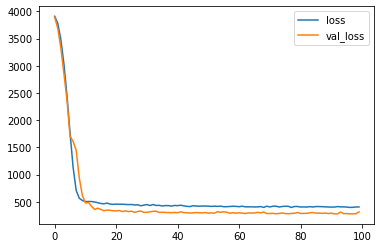

In [ ]:
#Neural Network
input_shape = [7]

NN_model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(1024, activation = "relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1024, activation = "relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1)
])

NN_model.compile(
    optimizer = "adam",
    loss = "mae",
    metrics = ["mae"]
)

NN_history = NN_model.fit(
    X_train, y_train,
    validation_data = (X_test, y_test),
    batch_size = 256,
    epochs = 100,
    verbose=1
)

history_df = pd.DataFrame(NN_history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

In [ ]:
print(("Minimum Validation Loss: {:0.4f}").format(history_df['val_loss'].min()))

Minimum Validation Loss: 278.0427
